In [1]:
suppressPackageStartupMessages(library(ArchR))
suppressPackageStartupMessages(library(ArchRNA))
suppressPackageStartupMessages(library(parallel))   
addArchRGenome("hg19") 

Setting default genome to Hg19.



In [2]:
download.file("https://cf.10xgenomics.com/samples/cell-exp/4.0.0/Parent_NGSC3_DI_PBMC/Parent_NGSC3_DI_PBMC_filtered_feature_bc_matrix.h5", destfile = "pbmc10k_filt.h5")

In [3]:
proj <- RnaArchRProject(c("pbmc10k_filt.h5"), c("pbmc"), "pbmc")

Importing Feature Matrix 1 of 1

Using GeneAnnotation set by addArchRGenome(Hg19)!

Overlap Per Sample w/ scATAC : pbmc=10194

2022-10-31 18:02:43 : 

2022-10-31 18:02:44 : Batch Execution w/ safelapply!, 0 mins elapsed.

2022-10-31 18:02:45 : Adding data to GeneExpressionMatrix !, 0.023 mins elapsed.

2022-10-31 18:02:51 : Adding counts to GeneExpressionMatrix !, 0.121 mins elapsed.

Using GeneAnnotation set by addArchRGenome(Hg19)!

Using GeneAnnotation set by addArchRGenome(Hg19)!

Validating Arrows...

Getting SampleNames...

1 


Copying ArrowFiles to Ouptut Directory! If you want to save disk space set copyArrows = FALSE

1 


Getting Cell Metadata...

1 


Merging Cell Metadata...

Initializing ArchRProject...


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /  

In [4]:
proj <- addRNAIterativeLSI(proj) 



Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-a54531e7d15d2-Date-2022-10-31_Time-18-02-55.log
If there is an issue, please report to github with logFile!

Warning message in if (grepl("log", units, ignore.case = TRUE)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (units %in% "BinarizedCounts") {:
“the condition has length > 1 and only the first element will be used”
2022-10-31 18:02:55 : Computing Variability Across All Features, 0 mins elapsed.

2022-10-31 18:03:01 : Computing Variable Features, 0.093 mins elapsed.

###########
2022-10-31 18:03:02 : Running LSI (1 of 2) on Top Features, 0.106 mins elapsed.
###########

2022-10-31 18:03:02 : Sampling Cells (N = 10000) for Estimated LSI, 0.107 mins elapsed.

2022-10-31 18:03:02 : Creating Sampled Partial Matrix, 0.107 mins elapsed.

2022-10-31 18:03:06 : Computing Estimated LSI (projectAll = FALSE), 0.181 mins elapsed.

Filtering 1 dims correlated > 0.75 to log1

In [5]:
proj <- addClusters(proj, reducedDims = "RNAIterativeLSI", biasCol = "Gex_nUMI")

ArchR logging to : ArchRLogs/ArchR-addClusters-a5453b6be77-Date-2022-10-31_Time-18-03-56.log
If there is an issue, please report to github with logFile!

2022-10-31 18:03:56 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10194
Number of edges: 392238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8955
Number of communities: 20
Elapsed time: 1 seconds


2022-10-31 18:04:09 : Testing Biased Clusters, 0.211 mins elapsed.

2022-10-31 18:04:09 : Identified Biased Clusters (n = 2), set filterBias = TRUE to re-assign these cells: , 0.213 mins elapsed.

Biased Clusters : 
Cluster19 
Cluster20 


2022-10-31 18:04:09 : Testing Outlier Clusters, 0.213 mins elapsed.

2022-10-31 18:04:09 : Assigning Cluster Names to 20 Clusters, 0.213 mins elapsed.

2022-10-31 18:04:09 : Finished addClusters, 0.214 mins elapsed.



In [6]:
proj <- addUMAP(proj, reducedDims = "RNAIterativeLSI", verbose = F, force=T) 

18:04:18 Creating temp model dir /tmp/Rtmpk0ugvH/dira5453afa7a18

18:04:18 Creating dir /tmp/Rtmpk0ugvH/dira5453afa7a18

18:04:19 Changing to /tmp/Rtmpk0ugvH/dira5453afa7a18

18:04:19 Creating /data/sz753404/git_code/ArchRNA/vignettes/pbmc/Embeddings/Save-Uwot-UMAP-Params-RNAIterativeLSI-a545373d5aa38-Date-2022-10-31_Time-18-04-18.tar



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-a54535896e8c3-Date-2022-10-31_Time-18-04-19.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-a54535896e8c3-Date-2022-10-31_Time-18-04-19.log



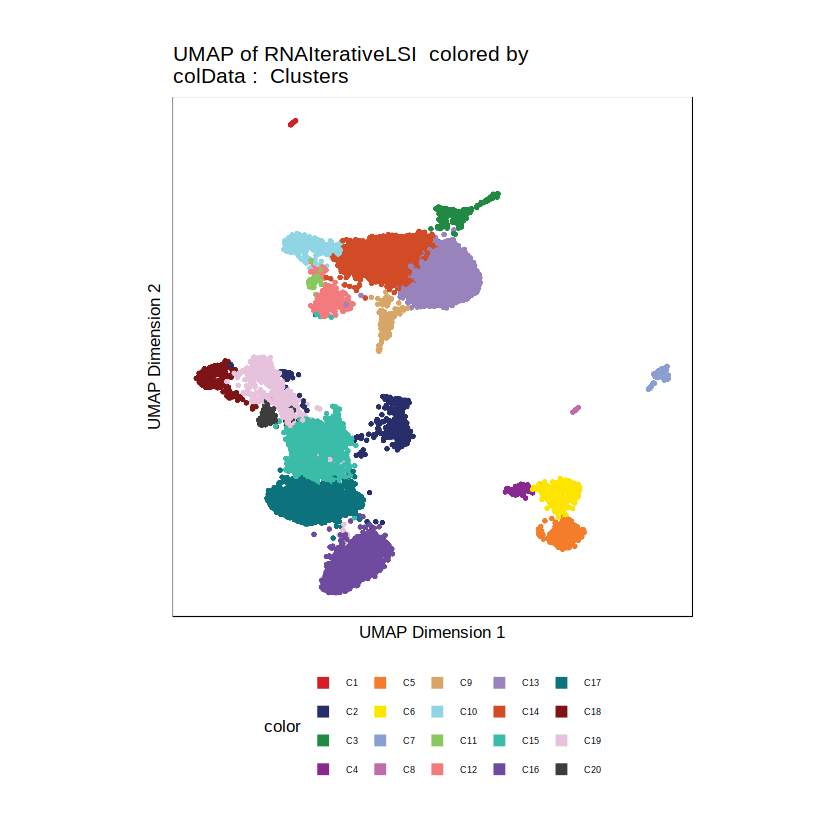

In [7]:
p1 <- plotEmbedding(proj, name = "Clusters", embedding = "UMAP", size = 1.5, labelAsFactors=F, labelMeans=F)
p1 

In [8]:
proj <- addTrajectory(proj, trajectory = c("C16","C17","C15", "C19", "C18"), reducedDims = "RNAIterativeLSI", force=T) 

ArchR logging to : ArchRLogs/ArchR-addTrajectory-a545372b4cf4a-Date-2022-10-31_Time-18-04-21.log
If there is an issue, please report to github with logFile!

Filtering outliers

Initial Alignment Before Spline Fit

Spline Fit

KNN to Spline

ArchR logging successful to : ArchRLogs/ArchR-addTrajectory-a545372b4cf4a-Date-2022-10-31_Time-18-04-21.log



ArchR logging to : ArchRLogs/ArchR-plotTrajectory-a545364f12a7c-Date-2022-10-31_Time-18-04-22.log
If there is an issue, please report to github with logFile!

Plotting

Warning message:
“Removed 5865 rows containing non-finite values (stat_summary_hex).”
Plotting Trajectory

Adding Inferred Arrow Trajectory to Plot

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-a545364f12a7c-Date-2022-10-31_Time-18-04-22.log

Warning message:
“Removed 5865 rows containing non-finite values (stat_summary_hex).”


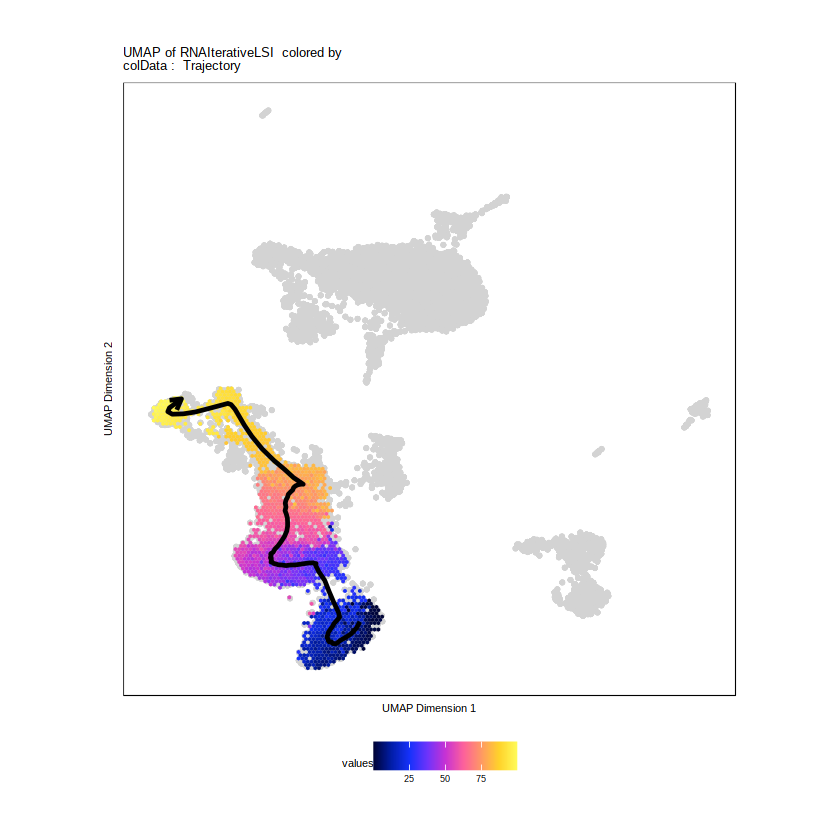

In [9]:
p3 <- plotTrajectory(proj, trajectory = "Trajectory", colorBy = "cellColData", name = "Trajectory")
p3[[1]]

In [10]:
traj <- getTrajectory(proj, "Trajectory", useMatrix="GeneExpressionMatrix")

Creating Trajectory Group Matrix..

Smoothing...



ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-a5453174b856-Date-2022-10-31_Time-18-04-44.log
If there is an issue, please report to github with logFile!

useSeqnames is NULL or greater than 1 with a Sparse.Assays.Matrix trajectory input.

2022-10-31 18:04:45 : 

force=FALSE thus continuing with subsetting useSeqnames = data

2022-10-31 18:04:45 : 

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-a5453174b856-Date-2022-10-31_Time-18-04-44.log



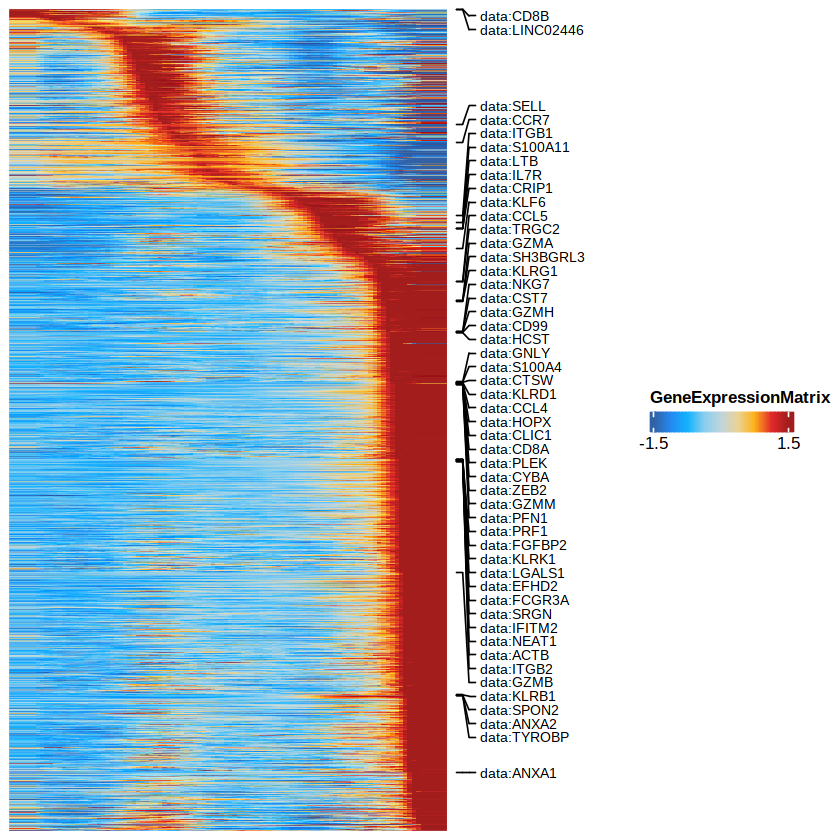

In [11]:
p4 <- plotTrajectoryHeatmap(traj, pal = paletteContinuous(set = "solarExtra"))
p4

In [12]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.6 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /data/sz753404/miniconda3/envs/schema/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.utf-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.utf-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] circlize_0.4.13                   ComplexHeatmap_2.11.1            
 [3] nabor_0.5.0                       sp_1.5-0                         
 [5] SeuratObject_4.1.1                Seurat_4.1.1.9001                
 [7] BSgenome.Hsapiens.UCSC.hg19_